In [ ]:
import os
import glob
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import tensorflow as tf
from PIL import Image as im
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
"""Importing images of following classes"""

classes = ['cat','bicycle', 'bear','airplane',
                'ant','banana','bench','book',
                'bottlecap', 'bread']

url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'

"""Making combined image dataset of all classes"""

# Download the data of the aforementioned classes
for class_ in classes:
	complete_url = url+class_+".npy"
	print("Downloading : ",complete_url)
	urllib.request.urlretrieve(complete_url, "./"+class_+".npy")

# Grep all the downloaded files and add them to a list
data_sets = glob.glob(os.path.join('./*.npy'))

In [ ]:
"""Creating train and test datasets"""

#initialize variables
# Train data
input = np.empty([0, 784])
# Test data
labels = np.empty([0])
index = 0

# Concatenate the train and test data from all the files
for file in data_sets:
	data = np.load(file)
	data = data[0: 6000, :]
	input = np.concatenate((input, data), axis=0)
	labels = np.append(labels, [index]*data.shape[0])
	index += 1

In [ ]:
# K-Folds cross-validator
n_fold = 5
kf = KFold(n_splits=n_fold, shuffle=True, random_state=9)
x_train, x_test, y_train, y_test = None, None, None, None
random_ordering = np.random.permutation(input.shape[0])
input = input[random_ordering, :]
labels = labels[random_ordering]

In [ ]:
# Divide the dataset into train and test
for train_index, test_index in kf.split(input):
    x_train, x_test = input[train_index], input[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    break

In [ ]:
print(len(x_train))
print(len(x_test))

48000
12000


In [ ]:
print(x_train[:20])
print(x_test[:20])
print(y_train[:20])
print(y_test[:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9. 0. 0. 7. 4. 9. 8. 7. 9. 4. 3. 7. 2. 3. 0. 4. 5. 9. 6. 9.]
[1. 3. 9. 7. 3. 2. 4. 0. 6. 1. 9. 8. 8. 0. 1. 9. 2. 2. 9. 1.]


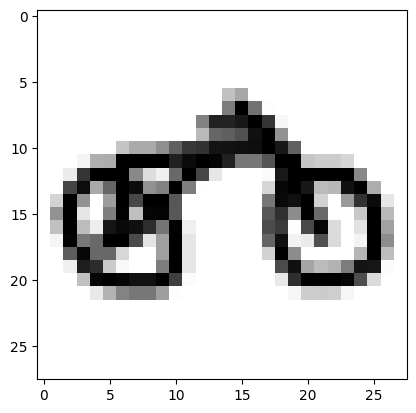

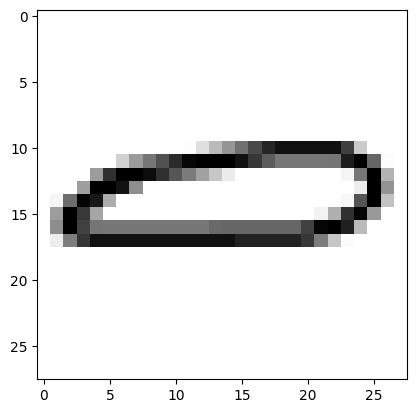

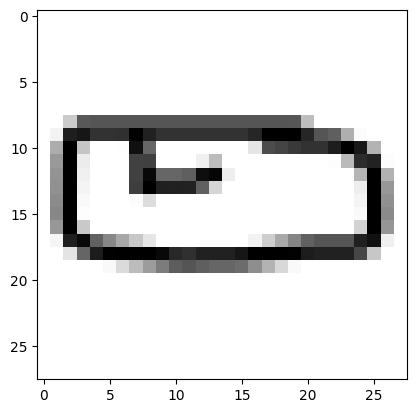

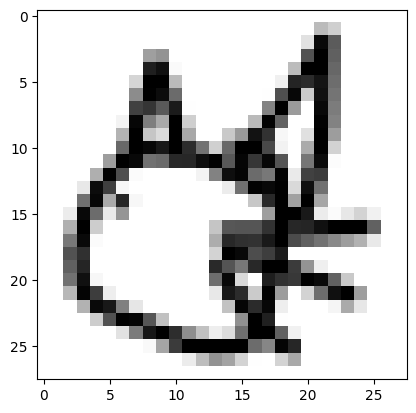

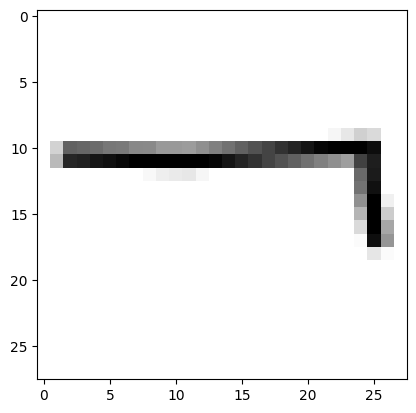

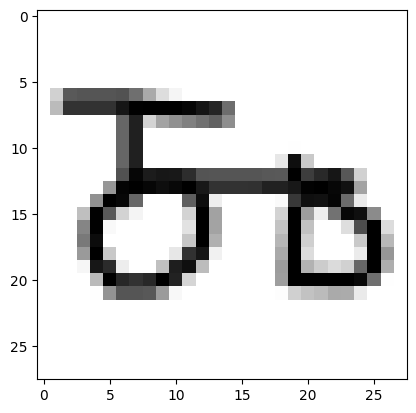

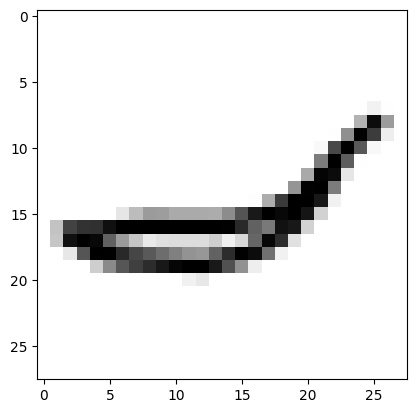

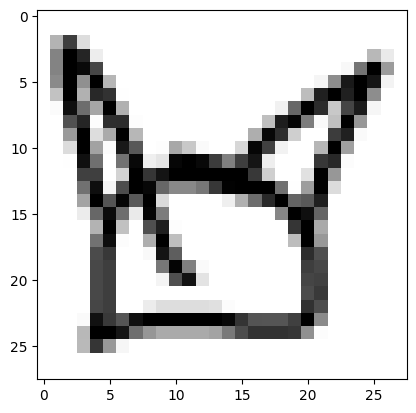

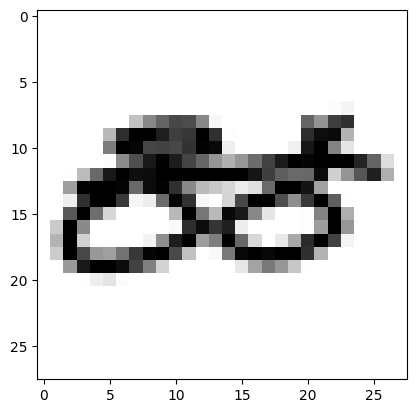

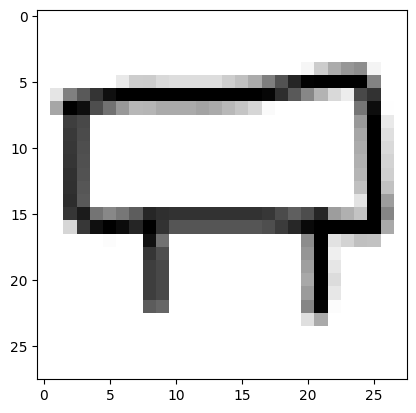

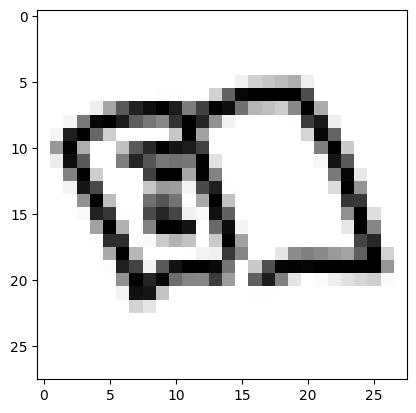

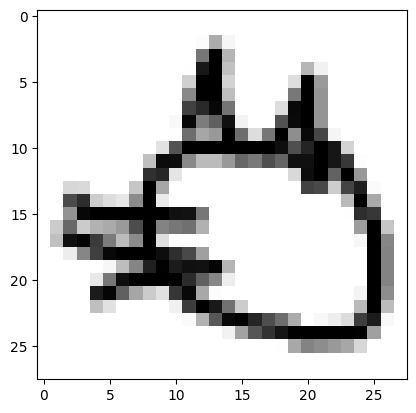

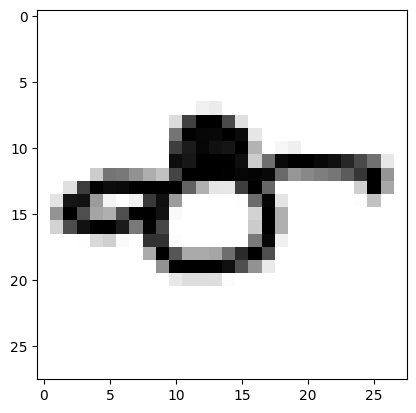

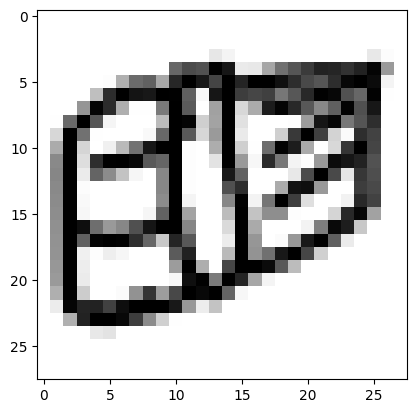

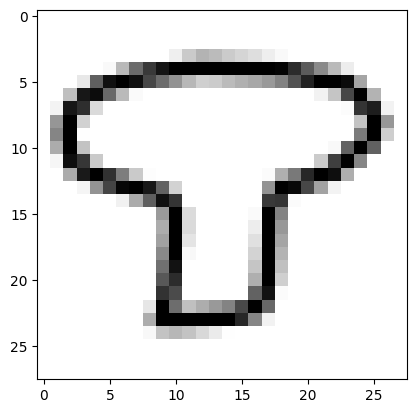

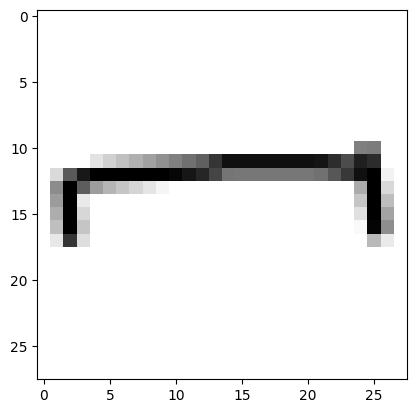

In [ ]:
"""Visualising the input images"""

import matplotlib.pyplot as plt
image_size = 28
x_train_ = x_train.reshape(x_train.shape[0], image_size, image_size)
for i in range(16):
  plt.grid(False)
  plt.imshow(x_train_[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
"""Normalisation"""

# Divide all the values by 255 to normalize the image
x_train /= 255.0
x_test /= 255.0

In [ ]:
# Saving for feature selection and 1d classifiers
x_train_fea = x_train
x_test_fea = x_test
x_train_1d = x_train
x_test_1d = x_test

In [ ]:
"""Reshaping"""

# Reshape the image size to be 28 x 28
image_size = 28
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

num_classes = len(classes)

In [ ]:
"""# Random Forest"""

from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf = RandomForestClassifier(n_estimators = 150, n_jobs=-1, random_state=0)
# model = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf.fit(x_train_1d, y_train)


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=0)

In [ ]:
"""Predicting"""

y_pred = clf_rf.predict(x_test_1d)
y_pred[:10]


array([1., 7., 9., 7., 0., 2., 4., 0., 6., 1.])

In [ ]:
"""Checkng Test Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7768333333333334


In [ ]:
"""# KNN"""

from sklearn.neighbors import KNeighborsClassifier

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
# knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn.fit(x_train_1d, y_train)


KNeighborsClassifier(n_jobs=-1)

In [ ]:
"""Predicting"""

y_pred = knn.predict(x_test_1d)
y_pred[:10]


array([4., 5., 9., 2., 0., 0., 4., 0., 0., 1.])

In [ ]:
"""Testing Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7373333333333333


In [ ]:
"""# MLP"""

from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp.fit(x_train_1d, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0)

In [ ]:
"""Predicting"""

y_pred = mlp.predict(x_test_1d)
y_pred[:10]

array([1., 3., 9., 7., 0., 0., 4., 0., 2., 1.])

In [ ]:
"""Testing Accuracy"""

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.76275


In [ ]:
"""# CNN"""

# CNN Model
model = keras.Sequential()
model.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
optimizer = tf.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
"""Fitting model"""

# Fit a model to the train data
model.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=5)

Epoch 1/5
384/384 [==============================] - 70s 182ms/step - loss: 0.3151 - accuracy: 0.9017 - val_loss: 0.3431 - val_accuracy: 0.8936
Epoch 2/5
384/384 [==============================] - 79s 207ms/step - loss: 0.2838 - accuracy: 0.9090 - val_loss: 0.3576 - val_accuracy: 0.8878
Epoch 3/5
384/384 [==============================] - 58s 151ms/step - loss: 0.2560 - accuracy: 0.9194 - val_loss: 0.3374 - val_accuracy: 0.8955
Epoch 4/5
384/384 [==============================] - 58s 151ms/step - loss: 0.2259 - accuracy: 0.9273 - val_loss: 0.3223 - val_accuracy: 0.8998
Epoch 5/5
384/384 [==============================] - 58s 150ms/step - loss: 0.2013 - accuracy: 0.9352 - val_loss: 0.3531 - val_accuracy: 0.8917


In [ ]:
"""Predicting"""

y_predict = model.predict(x_test)
y_predict[:2]

375/375 [==============================] - 5s 13ms/step


array([[1.0254444e-05, 9.9830699e-01, 3.2981587e-04, 2.4160157e-05,
        2.0208515e-04, 1.1672180e-04, 6.1930891e-04, 3.7662309e-04,
        1.2961955e-05, 9.9414353e-07],
       [1.8463181e-01, 3.1402189e-02, 1.2838727e-01, 6.3133836e-01,
        3.1641650e-03, 1.6912626e-02, 3.6174184e-04, 3.4003169e-03,
        3.8247512e-04, 1.8968511e-05]], dtype=float32)

In [ ]:
"""Testing Accuracy"""

# Obtain the accuracy of the above model on the test data
accuracy = model.evaluate(x_test, y_test)

375/375 [==============================] - 5s 14ms/step - loss: 0.3576 - accuracy: 0.8927


In [ ]:

"""# Feature Selection"""

# Taking old data inputs
x_train = x_train_fea
x_test = x_test_fea

x_train_1d = x_train_fea
x_test_1d = x_test_fea
from sklearn.feature_selection import chi2, SelectKBest
n_features = 400
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x_train_1d, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(range(len(x_train_1d)))
#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(n_features,'Score'))  #print 1 best features

     Specs        Score
529    529  5437.559870
501    501  5039.785162
506    506  5022.955930
557    557  4787.562525
534    534  4478.765143
..     ...          ...
242    242  1436.325036
356    356  1425.688967
294    294  1424.651433
248    248  1408.654144
304    304  1406.981281

[400 rows x 2 columns]


In [ ]:
fit.scores_[100:120]

array([2842.4199327 , 2798.36558354, 2704.09291301, 2613.41537744,
       2589.35511149, 2694.10231243, 2512.96264094, 2142.55536148,
       1574.00525058,  856.40036167,  156.99368132,           nan,
                 nan,  198.96320076, 1089.92449554, 1907.69072381,
       2538.81146236, 2813.1533671 , 2751.86024915, 2588.87127763])

In [ ]:
featureScores.nlargest(n_features,'Score')

,Specs,Score
529,529,5437.559870
501,501,5039.785162
506,506,5022.955930
557,557,4787.562525
534,534,4478.765143
...,...,...
242,242,1436.325036
356,356,1425.688967
294,294,1424.651433
248,248,1408.654144


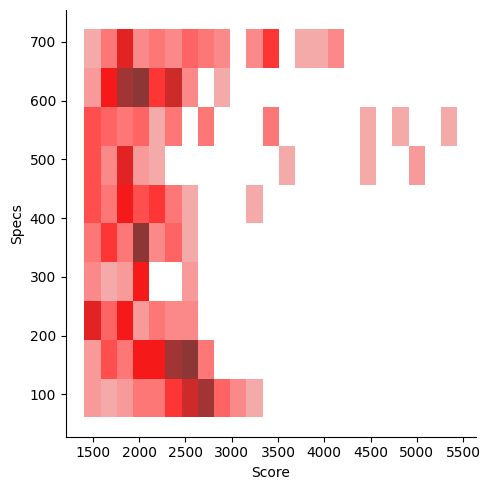

In [ ]:
sns.displot(data=featureScores.nlargest(n_features,'Score'), x="Score", y="Specs", color="Red")

In [ ]:
train_x_new = []
for x_tr in x_train_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_tr[i])
  train_x_new.append(temp)

train_x_new[0][115:120]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
test_x_new = []
for x_te in x_test_1d:
  temp = []
  for i in featureScores.nlargest(n_features, 'Score')['Specs']:
      temp.append(x_te[i])
  test_x_new.append(temp)

test_x_new[0][:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
print(len(train_x_new))
print(len(test_x_new))

48000
12000


In [ ]:
"""# Updating the dataset with new features"""

x_train = np.array(train_x_new)
x_test = np.array(test_x_new)

x_train_1d = x_train
x_test_1d = x_test
# Reshape the image size to be 20 x 20
image_size = 20
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

In [ ]:
"""# Random Forest"""

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': [100,120,140,160]}

clf_rf_fe = RandomForestClassifier(n_estimators = 280, n_jobs=-1, random_state=0)
# clf_rf = GridSearchCV(clf_rf, parameters, n_jobs=-1)
clf_rf_fe.fit(x_train_1d, y_train)

y_pred = clf_rf_fe.predict(x_test_1d)
print(y_pred[:10])

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


[1. 6. 9. 7. 0. 2. 4. 0. 6. 1.]
0.7655


In [ ]:
"""# KNN"""

from sklearn.neighbors import KNeighborsClassifier

tuning_parameters = {'n_neighbors': [1,3,5,7,9,11]}

knn_fe = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1)
# knn = GridSearchCV(clf_knn, tuning_parameters, n_jobs=-1)
knn_fe.fit(x_train_1d, y_train)

y_pred = knn_fe.predict(x_test_1d)
print(y_pred[:10])

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[1. 3. 9. 7. 0. 2. 4. 0. 0. 1.]
0.71325


In [ ]:
"""# MLP"""

from sklearn.neural_network import MLPClassifier

tuning_parameaters = {'hidden_layer_sizes' : [(50,), (100,), (784,), (50,50), (100,100), (784,784), (50,50,50), (100,100,100)],
                    'alpha' : list(10.0 ** -np.arange(1, 7))}

mlp_fe = MLPClassifier(hidden_layer_sizes=(784,784), random_state=0)
# mlp = GridSearchCV(clf_mlp, param_grid=tuning_parameaters, n_jobs=-1)
mlp_fe.fit(x_train_1d, y_train)

y_pred = mlp_fe.predict(x_test_1d)
print(y_pred[:10])

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[1. 3. 9. 7. 0. 0. 4. 0. 1. 1.]
0.7920833333333334


In [ ]:
"""# CNN"""

# Reshaping
image_size = 28
x_train = x_train_fea.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test_fea.reshape(x_test.shape[0], image_size, image_size, 1)

# CNN Model
model_fe = keras.Sequential()
model_fe.add(layers.Convolution2D(64, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size=(3, 3)))
model_fe.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
model_fe.add(layers.MaxPooling2D(pool_size =(3,3)))
model_fe.add(layers.Flatten())
model_fe.add(layers.Dense(128, activation='relu'))
model_fe.add(layers.Dense(len(classes), activation='softmax'))
optimizer = tf.optimizers.Adam()
model_fe.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit a model to the train data
model_fe.fit(x = x_train, y = y_train, batch_size = 100,  validation_split = 0.2, epochs=15)

y_pred = model_fe.predict(x_test)
print(y_pred[:2])

# Obtain the accuracy of the above model on the test data
accuracy = model_fe.evaluate(x_test, y_test)
print("Accuracy =", accuracy)

Epoch 1/15
384/384 [==============================] - 82s 162ms/step - loss: 0.9333 - accuracy: 0.6982 - val_loss: 0.5763 - val_accuracy: 0.8163
Epoch 2/15
384/384 [==============================] - 63s 164ms/step - loss: 0.5207 - accuracy: 0.8410 - val_loss: 0.4509 - val_accuracy: 0.8610
Epoch 3/15
384/384 [==============================] - 62s 162ms/step - loss: 0.4191 - accuracy: 0.8713 - val_loss: 0.3897 - val_accuracy: 0.8799
Epoch 4/15
384/384 [==============================] - 62s 163ms/step - loss: 0.3574 - accuracy: 0.8894 - val_loss: 0.3498 - val_accuracy: 0.8909
Epoch 5/15
384/384 [==============================] - 62s 162ms/step - loss: 0.3160 - accuracy: 0.9029 - val_loss: 0.3455 - val_accuracy: 0.8918
Epoch 6/15
384/384 [==============================] - 64s 166ms/step - loss: 0.2777 - accuracy: 0.9131 - val_loss: 0.3671 - val_accuracy: 0.8877
Epoch 7/15
384/384 [==============================] - 64s 167ms/step - loss: 0.2498 - accuracy: 0.9209 - val_loss: 0.3333 - val_ac

<ipython-input-43-f1a1eaa6f4e8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


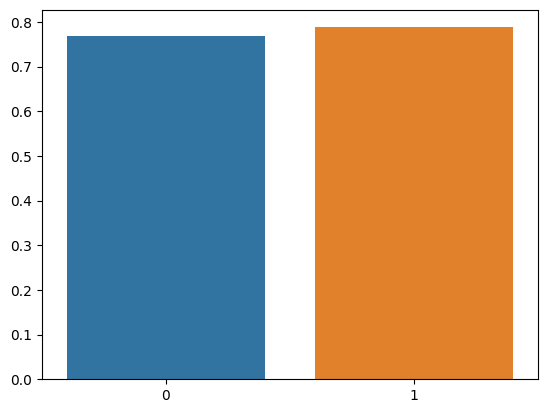

In [ ]:
df = pd.DataFrame([[0.769, 0.788]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-44-ad8cb660bc59>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


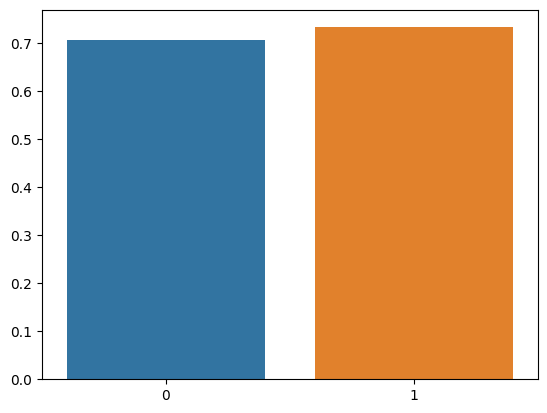

In [ ]:
df = pd.DataFrame([[0.707, 0.73375]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-45-74be3d5523d0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


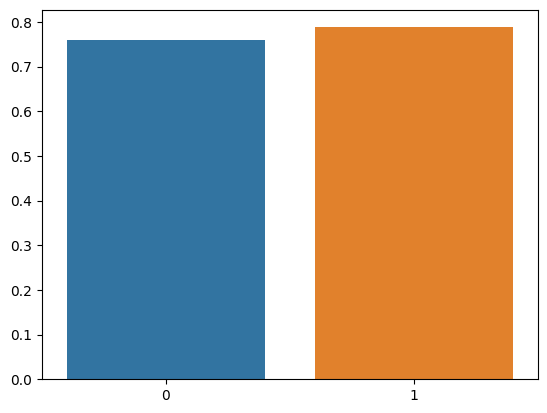

In [ ]:
df = pd.DataFrame([[0.759, 0.788]])
ax = sns.barplot(data=df, ci="sd")

<ipython-input-46-e62977151ae2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df, ci="sd")


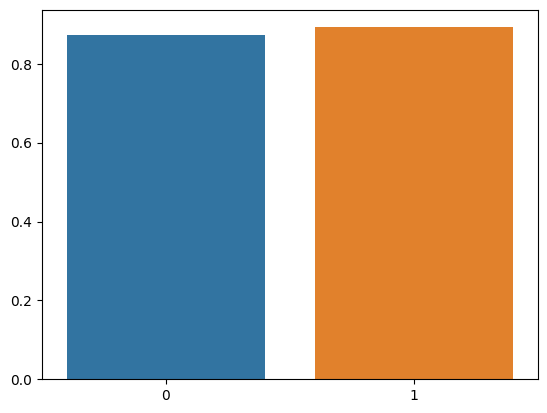

In [ ]:
df = pd.DataFrame([[0.8717, 0.8924]])
ax = sns.barplot(data=df, ci="sd")